In [49]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PlotFuncs import *
from LabFuncs import *
from Params import *
from HaloFuncs import *
from scipy.stats import norm
import pandas
import cmocean
from copy import copy


df = pandas.read_csv('../data/Gaia-SDSS.csv')
df_S = pandas.read_csv('../data/GAIA_SDSS_Shards.csv')
names = df_S.group_id.unique()

df_GC = pandas.read_csv('../data/Sequoia_GCs.csv')
GCnames = df_GC.ID.unique()
nGCs = size(GCnames)

In [71]:
# Fit data to three component halo
means_init = zeros(shape=(3,4))
means_init[0,:] = array([0.0,0.0,0.0,-1.4]) # Sausage
means_init[1,:] = array([0.0,0.0,0.0,-2.0]) # Halo
means_init[2,:] = array([0.0,126.0,0.0,-1.8]) # Halo
weights_init = array([0.5,0.34,0.16])
covariance_type = 'full'
data = array([df.GalRVel,df.GalphiVel,df.GalzVel,df.feh]).T
clf = mixture.GaussianMixture(n_components=3, covariance_type=covariance_type,
                              weights_init=weights_init,means_init=means_init,tol=1e-12,reg_covar=1e-8,max_iter=1000)
clf.fit(data)
Ps = clf.predict_proba(data)
meens = clf.means_
covs = clf.covariances_
ws = clf.weights_
eta = ws[0]

Ps = clf.predict_proba(data)
imod = argmax(Ps,axis=1)
df1 = df.loc[imod==0]
df2 = df.loc[imod==1]
df3 = df.loc[imod==2]

Ps1 = Ps[imod==0]
Ps2 = Ps[imod==1]
Ps3 = Ps[imod==2]

In [86]:
shape(J)

(3, 36276)

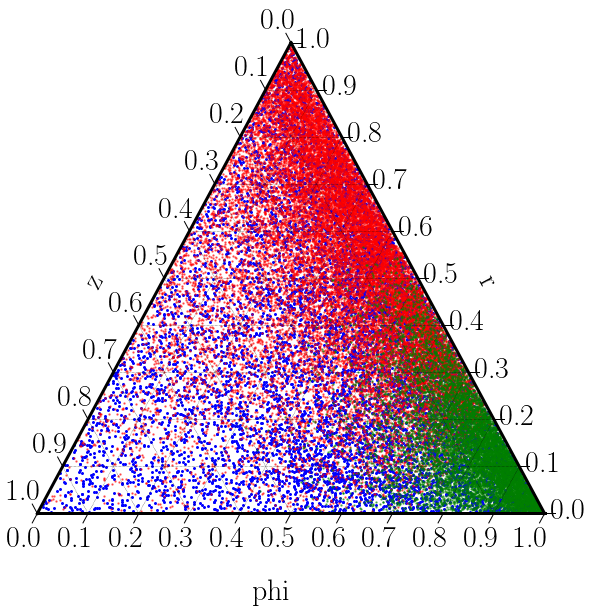

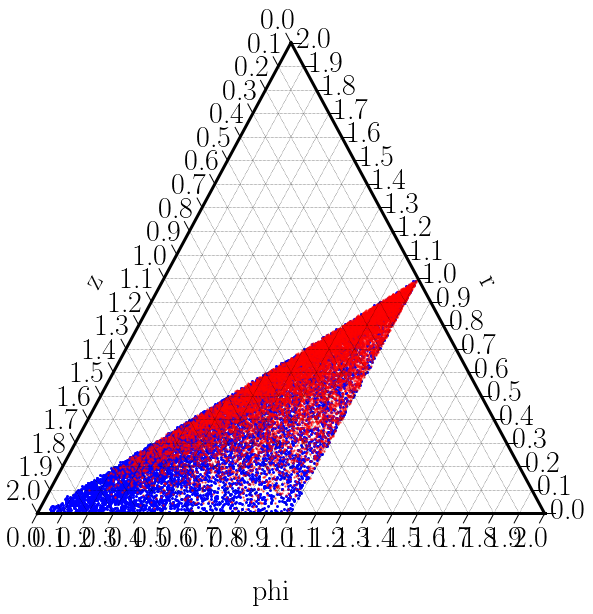

In [125]:
def Jpro_ret(dfi):
    dfi_pro = dfi.loc[dfi.Jphi>0.0]
    dfi_ret = dfi.loc[dfi.Jphi<0.0]
    Jtot_pro = ((dfi_pro.JR).values+abs(dfi_pro.Jphi).values+(dfi_pro.Jz).values)
    Jtot_ret = ((dfi_ret.JR).values+abs(dfi_ret.Jphi).values+(dfi_ret.Jz).values)

    J_pro = array([(dfi_pro.Jphi/Jtot_pro),dfi_pro.JR/Jtot_pro,dfi_pro.Jz/Jtot_pro]).T
    J_ret = array([Jtot_ret-abs(dfi_ret.Jphi/Jtot_ret),dfi_ret.JR/Jtot_ret,dfi_ret.Jz/Jtot_ret]).T

    return J_pro,J_ret

J1_pro,J1_ret = Jpro_ret(df1)
J2_pro,J2_ret = Jpro_ret(df2)
J3_pro,J3_ret = Jpro_ret(df3)


import ternary

plt.rcParams['axes.linewidth'] = 1.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=30)


### Scatter Plot
scale = 1.0
mw = 0.1


figure, tax = ternary.figure(scale=scale)
figure.set_size_inches(10, 10)
tax.boundary(linewidth=3.0)
tax.gridlines(multiple=mw, color="k")
tax.ticks(axis='lbr', linewidth=1, multiple=mw,fontsize=30,offset=0.02,tick_formats="%.1f")
tax.scatter(J2_pro, marker='.', color='blue',s=15)
tax.scatter(J1_pro, marker='.', color='red',s=8,alpha=0.5)
tax.scatter(J3_pro, marker='.', color='green',s=8,alpha=0.5)
tax.left_axis_label("z", fontsize=30, offset=0.14) # 2
tax.right_axis_label("r", fontsize=30, offset=0.14) # 1
tax.bottom_axis_label("phi", fontsize=30, offset=0.14) # 0
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')
tax.show()


figure, tax = ternary.figure(scale=2.0)
figure.set_size_inches(10, 10)
tax.boundary(linewidth=3.0)
tax.gridlines(multiple=mw, color="k")
tax.ticks(axis='lbr', linewidth=1, multiple=mw,fontsize=30,offset=0.02,tick_formats="%.1f")
tax.scatter(J2_ret, marker='.', color='blue',s=15)
tax.scatter(J1_ret, marker='.', color='red',s=8,alpha=0.5)
#tax.scatter(J3_ret, marker='.', color='purple',s=8,alpha=0.5)
tax.left_axis_label("z", fontsize=30, offset=0.14) # 2
tax.right_axis_label("r", fontsize=30, offset=0.14) # 1
tax.bottom_axis_label("phi", fontsize=30, offset=0.14) # 0
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')
tax.show()

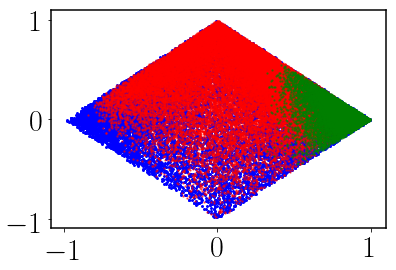

In [139]:
def Jtri(dfi):
    feh = dfi.feh
    Jtot = ((dfi.JR).values+abs(dfi.Jphi).values+(dfi.Jz).values)
    Jtri = array([(dfi.Jphi/Jtot),(dfi.JR-dfi.Jz)/Jtot]).T
    return Jtri

J1tri = Jtri(df1)
J2tri = Jtri(df2)
J3tri = Jtri(df3)


plt.scatter(J2tri[:,0],J2tri[:,1], marker='.', color='blue',s=15)
plt.scatter(J1tri[:,0],J1tri[:,1], marker='.', color='red',s=8,alpha=0.5)
plt.scatter(J3tri[:,0],J3tri[:,1], marker='.', color='green',s=8,alpha=0.5)

plt.show()

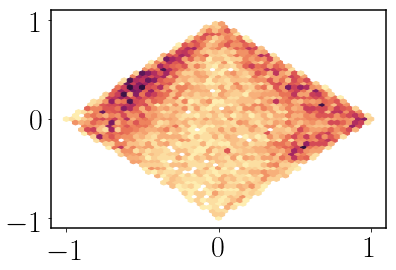

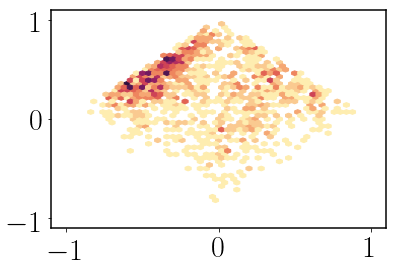

In [159]:
cmap = cmocean.cm.matter
cmap = copy(plt.get_cmap(cmap))
cmap.set_under('white', 1.0)

J0tri = Jtri(df)



J2tri = Jtri(df2.loc[df2.E>-1.5e5])
plt.hexbin(J2tri[:,0],J2tri[:,1],extent=(-1,1,-1,1),gridsize=50,cmap=cmap,mincnt=1)
plt.show()

J2tri = Jtri(df2.loc[df2.E>-1.1e5])
plt.hexbin(J2tri[:,0],J2tri[:,1],extent=(-1,1,-1,1),gridsize=50,cmap=cmap,mincnt=1)
plt.show()

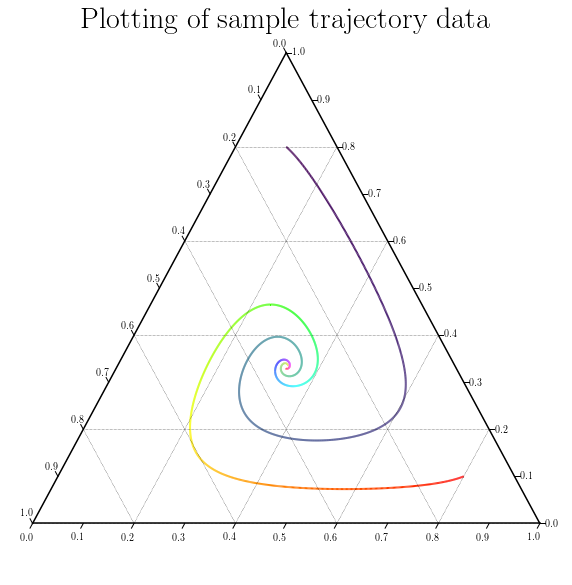

In [63]:
# Load some data, tuples (x,y,z)
points = []
with open("curve.txt") as handle:
    for line in handle:
        points.append(list(map(float, line.split(' '))))

# Using same points as above

fig, tax = ternary.figure(scale=1.0)
fig.set_size_inches(10, 10)

tax.plot_colored_trajectory(points, linewidth=2.0)

## Shuffle points for additional plot
points = [(y, z, x) for (x, y, z) in points]
tax.plot_colored_trajectory(points, cmap="hsv", linewidth=2.0)

tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.ticks(axis='lbr', linewidth=1, multiple=0.1, tick_formats="%.1f")
tax.boundary()
tax.set_title("Plotting of sample trajectory data", fontsize=30)
tax.gridlines(multiple=0.2, color="black")
tax.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

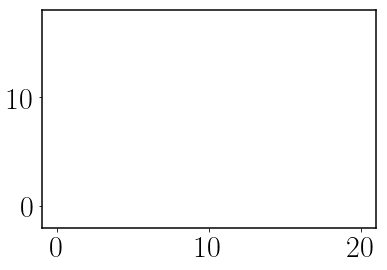

In [83]:
def generate_random_heatmap_data(scale=5):
    from ternary.helpers import simplex_iterator
    d = dict()
    for (i,j,k) in simplex_iterator(scale):
        d[(i,j)] = random()
    return d

scale = 20
d = generate_random_heatmap_data(scale)
figure, tax = ternary.figure(scale=scale)
tax.heatmap(d, style="h")
tax.boundary()
tax.set_title("Heatmap Test: Hexagonal")

In [82]:
d

{(0, 0): 0.12177862434672049,
 (0, 1): 0.3965173677103121,
 (0, 2): 0.8246308437507158,
 (0, 3): 0.039468792403270614,
 (0, 4): 0.04941625023489071,
 (0, 5): 0.11243811132540671,
 (0, 6): 0.26096449985527714,
 (0, 7): 0.9634113670372552,
 (0, 8): 0.11661060790376554,
 (0, 9): 0.5278402013319943,
 (0, 10): 0.814875502122167,
 (0, 11): 0.9143170130218617,
 (0, 12): 0.3263019375717112,
 (0, 13): 0.3695626224668055,
 (0, 14): 0.9498109907819379,
 (0, 15): 0.2847215671329465,
 (0, 16): 0.9359115742298012,
 (0, 17): 0.35987130261917055,
 (0, 18): 0.9503323345948833,
 (0, 19): 0.06554924381238414,
 (0, 20): 0.6979183589425619,
 (1, 0): 0.3107788982196069,
 (1, 1): 0.2787637831819164,
 (1, 2): 0.18090585143998006,
 (1, 3): 0.7819045219659473,
 (1, 4): 0.8956200225883792,
 (1, 5): 0.6001016863522024,
 (1, 6): 0.580284445433723,
 (1, 7): 0.08282782049368187,
 (1, 8): 0.11399177171519337,
 (1, 9): 0.9194902944795058,
 (1, 10): 0.5534844166131955,
 (1, 11): 0.4489398938878073,
 (1, 12): 0.04997696

In [200]:
print("Sausage")
print("$%.2f \pm %.2f$" % (meens[0,0],sqrt(covs[0,0,0])))
print("$%.2f \pm %.2f$" % (meens[0,1],sqrt(covs[0,1,1])))
print("$%.2f \pm %.2f$" % (meens[0,2],sqrt(covs[0,2,2])))
print("$%.2f \pm %.2f$" % (meens[0,3],sqrt(covs[0,3,3])))
print("$%.2f$"%sqrt(covs[0,0,1]*(covs[0,0,1]>.0)))
print("$%.2f$"%sqrt(covs[0,0,2]*(covs[0,0,2]>.0)))
print("$%.2f$"%sqrt(covs[0,1,2]*(covs[0,1,2]>.0)))
print("$%.2f$"%ws[0])


print("")
print("Halo")
print("%.2f \pm %.2f" % (meens[1,0],sqrt(covs[1,0,0])))
print("%.2f ± %.2f" % (meens[1,1],sqrt(covs[1,1,1])))
print("%.2f ± %.2f" % (meens[1,2],sqrt(covs[1,2,2])))
print("%.2f ± %.2f" % (meens[1,3],sqrt(covs[1,3,3])))
print(sqrt(covs[1,:,:]*(covs[1,:,:]>.0)))
print("w = %.2f"%ws[1])

print("")
print("Disk")
print("%.2f ± %.2f" % (meens[2,0],sqrt(covs[2,0,0])))
print("%.2f ± %.2f" % (meens[2,1],sqrt(covs[2,1,1])))
print("%.2f ± %.2f" % (meens[2,2],sqrt(covs[2,2,2])))
print("%.2f ± %.2f" % (meens[2,3],sqrt(covs[2,3,3])))
print(sqrt(covs[2,:,:]*(covs[2,:,:]>.0)))
print("w = %.2f"%ws[2])


Sausage
$-8.17 \pm 158.93$
$25.72 \pm 61.50$
$0.99 \pm 80.86$
$-1.39 \pm 0.23$
$-0.00$
$61.65$
$-0.00$
$0.51$

Halo
-0.06 \pm 144.44
5.97 ± 120.03
8.03 ± 115.67
-1.90 ± 0.40
[[144.44255038  -0.          39.30495383   1.26824424]
 [ -0.         120.03195274  -0.          -0.        ]
 [ 39.30495383  -0.         115.66973353   1.30481001]
 [  1.26824424  -0.           1.30481001   0.39917568]]
w = 0.33

Disk
12.37 ± 76.75
128.78 ± 50.13
3.57 ± 62.69
-1.67 ± 0.27
[[76.75067966 10.3602299  30.1201609  -0.        ]
 [10.3602299  50.12568662 -0.          1.24266771]
 [30.1201609  -0.         62.69161852  0.14148532]
 [-0.          1.24266771  0.14148532  0.27144356]]
w = 0.16


In [236]:
sigrp1 = covs[0,0,1]/sqrt(covs[0,1,1]*covs[0,0,0])
sigrp2 = covs[1,0,1]/sqrt(covs[1,1,1]*covs[1,0,0])
sigrp3 = covs[2,0,1]/sqrt(covs[2,1,1]*covs[2,0,0])

sigrz1 = covs[0,0,2]/sqrt(covs[0,2,2]*covs[0,0,0])
sigrz2 = covs[1,0,2]/sqrt(covs[1,2,2]*covs[1,0,0])
sigrz3 = covs[2,0,2]/sqrt(covs[2,2,2]*covs[2,0,0])

sigpz1 = covs[0,1,2]/sqrt(covs[0,1,1]*covs[0,2,2])
sigpz2 = covs[1,1,2]/sqrt(covs[1,1,1]*covs[1,2,2])
sigpz3 = covs[2,1,2]/sqrt(covs[2,1,1]*covs[2,2,2])

print(r"$\bar{v}_r[{\rm km\,s}^{-1}]$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ \\" % (meens[1,0],sqrt(covs[1,0,0]),meens[0,0],sqrt(covs[0,0,0]),meens[2,0],sqrt(covs[2,0,0])))
print(r"$\bar{v}_\phi[{\rm km\,s}^{-1}]$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ \\" % (meens[1,1],sqrt(covs[1,1,1]),meens[0,1],sqrt(covs[0,1,1]),meens[2,1],sqrt(covs[2,1,1])))
print(r"$\bar{v}_z[{\rm km\,s}^{-1}]$ & $%.1f \pm %.1f$ & $%.2f \pm %.1f$ & $%.1f \pm %.1f$ \\" % (meens[1,2],sqrt(covs[1,2,2]),meens[0,2],sqrt(covs[0,2,2]),meens[2,2],sqrt(covs[2,2,2])))
print(r"$\overline{\rm [Fe/H]}$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ & $%.1f \pm %.1f$ \\" % (meens[1,3],sqrt(covs[1,3,3]),meens[0,3],sqrt(covs[0,3,3]),meens[2,3],sqrt(covs[2,3,3])))
print(r"$\Sigma_{r\phi}/\sigma_r\sigma_\phi$ & $%.1f$ & $%.1f$ & $%.1f$ \\"%(sigrp2,sigrp1,sigrp3))
print(r"$\Sigma_{rz}/\sigma_r\sigma_z$ & $%.1f$ & $%.1f$ & $%.1f$ \\"%(sigrz2,sigrz1,sigrz3))
print(r"$\Sigma_{\phi z}/\sigma_\phi\sigma_z$ & $%.1f$ & $%.1f$ & $%.1f$ \\"%(sigpz2,sigpz1,sigpz3))
print(r"$w$ & $%.2f$ & $%.2f$ & $%.2f$ \\"%(ws[1],ws[0],ws[2]))


$\bar{v}_r[{\rm km\,s}^{-1}]$ & $-0.1 \pm 144.4$ & $-8.2 \pm 158.9$ & $12.4 \pm 76.8$ \\
$\bar{v}_\phi[{\rm km\,s}^{-1}]$ & $6.0 \pm 120.0$ & $25.7 \pm 61.5$ & $128.8 \pm 50.1$ \\
$\bar{v}_z[{\rm km\,s}^{-1}]$ & $8.0 \pm 115.7$ & $0.99 \pm 80.9$ & $3.6 \pm 62.7$ \\
$\overline{\rm [Fe/H]}$ & $-1.9 \pm 0.4$ & $-1.4 \pm 0.2$ & $-1.7 \pm 0.3$ \\
$\Sigma_{r\phi}/\sigma_r\sigma_\phi$ & $-0.0$ & $-0.0$ & $0.0$ \\
$\Sigma_{rz}/\sigma_r\sigma_z$ & $0.1$ & $0.3$ & $0.2$ \\
$\Sigma_{\phi z}/\sigma_\phi\sigma_z$ & $-0.0$ & $-0.0$ & $-0.0$ \\
$w$ & $0.33$ & $0.51$ & $0.16$ \\


In [232]:
sigpz3

-0.0052305647523619185

In [229]:
sigrp1 = covs[0,0,1]/sqrt(covs[0,1,1]*covs[0,0,0])
sigrp2 = covs[1,0,1]/sqrt(covs[1,1,1]*covs[1,0,0])
sigrp3 = covs[2,0,1]/sqrt(covs[2,1,1]*covs[2,0,0])

sigrz1 = covs[0,0,2]/sqrt(covs[0,2,2]*covs[0,0,0])
sigrz2 = covs[1,0,2]/sqrt(covs[1,2,2]*covs[1,0,0])
sigrz3 = covs[2,0,2]/sqrt(covs[2,2,2]*covs[2,0,0])

sigpz1 = covs[0,1,2]/sqrt(covs[0,1,1]*covs[0,2,2])
sigpz2 = covs[1,1,2]/sqrt(covs[1,1,1]*covs[1,2,2])
sigpz3 = covs[2,1,2]/sqrt(covs[2,1,1]*covs[2,2,2])

-0.04147288049118558

In [249]:
Ps[0,:]

array([0.00100354, 0.96601213, 0.03298434])

In [258]:
sum(imod==1)/(1.0*size(imod))

0.28936183224780604

In [259]:
sum(Ps[:,1]>0.5)/(1.0*size(imod))

0.27673302143534234